<a href="https://colab.research.google.com/github/ghxstex/Car-Price-Prediction-Model/blob/main/Car_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas is imported to handle tabular data.

The dataset is loaded from the CSV file.

.shape tells us the number of rows and columns in the dataset.

In [1]:
import pandas as pd

df = pd.read_csv("CarPricePrediction.csv")

print("Dataset Shape:", df.shape)

print("\nDataset Info:")
df.info()
df.head()


Dataset Shape: (4340, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
print("\nMissing Values:\n", df.isnull().sum())
df.describe()


Missing Values:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [3]:
df = df.drop("name", axis=1)

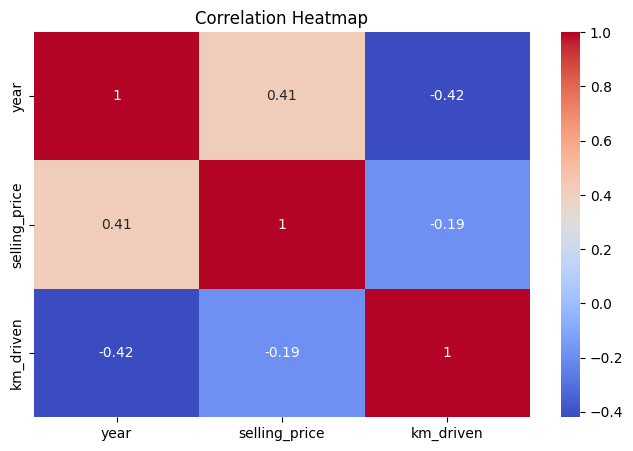

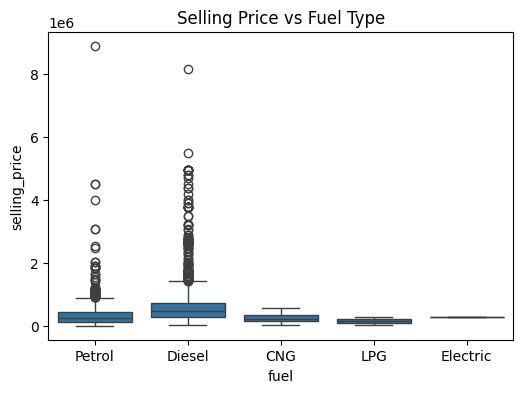

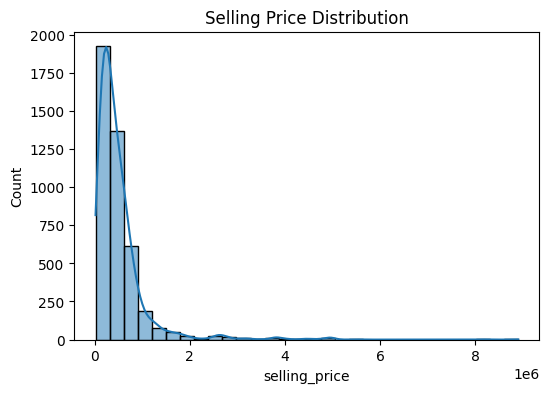

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="fuel", y="selling_price")
plt.title("Selling Price vs Fuel Type")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["selling_price"], bins=30, kde=True)
plt.title("Selling Price Distribution")
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["seller_type"] = le.fit_transform(df["seller_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["owner"] = le.fit_transform(df["owner"])

X = df.drop("selling_price", axis=1)
y = df["selling_price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Model Evaluation Metrics:
MAE: 222188.9426151671
MSE: 184963450105.73502
RMSE: 430073.77286430175
R² Score: 0.3939008529340018


In [8]:
coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Importance:\n")
print(coeff_df)



Feature Importance:

                Coefficient
year           37229.800158
km_driven         -1.042556
fuel          -95200.774217
seller_type   -27058.469278
transmission -908307.750386
owner         -13980.640351
